In [1]:
%matplotlib inline
import numpy as np
import pylab
from invisible_cities.io.mcinfo_io import load_mcparticles_df
from invisible_cities.io.mcinfo_io import load_mchits_df
from invisible_cities.io.mcinfo_io import load_mcconfiguration
import pandas as pd
%config InlineBackend.figure_format = 'svg'


In [2]:
#help(load_mcparticles_df)
# help(mcinfo_io)

In [6]:
# Load the configuration
config = load_mcconfiguration("/Users/mistryk2/Packages/nexus/workdir/files/NextTon_ThermalNeutron_Xe126.next.h5") 
# config
# events = int( config[config.param_key.str.contains("num_events")].param_value.iloc[0]  )
# events = config[config.param_key.str.contains("num_events")]
# events = events.param_value.iloc[0]
# print(events)

In [7]:
# Load in the dataframe
# data = load_mcparticles_df("/Users/mistryk2/Packages/nexus/workdir/files/Kr83_full_nexus_ACTIVE_7bar_100ev.sim.h5") 
# data = load_mcparticles_df("/Users/mistryk2/Packages/nexus/workdir/files/NextTon_FastNeutron_Xe131.next.h5") 
data = load_mcparticles_df("../outputs/NextTon_FastNeutron_XeHe_0p1pct.next.h5") 
print(data.info)

index = 254
xe137 = data.loc[index][data.loc[index].particle_name.str.contains('Xe137')]
print(xe137)

# data.particle_name.unique()
# print(data.index.get_level_values('event_id').unique())

# print(data.creator_proc.unique())


<bound method DataFrame.info of                      particle_name  primary  mother_id    initial_x  \
event_id particle_id                                                  
0        1                 neutron     True          0 -1002.651733   
         7                    Cu65    False          1 -1036.353149   
         6                   gamma    False          1 -1036.353149   
         19                     e-    False          6 -1030.428955   
         18                     e-    False          6 -1030.428955   
...                            ...      ...        ...          ...   
6323     69                 proton    False          3  -387.955231   
         68                 proton    False          3  -350.673279   
         67                    O16    False          3  -346.062531   
         66                   Cu65    False          3  -392.457672   
         2                  proton    False          1  -991.010010   

                       initial_y    initial_

In [5]:
# Remove the particle id with large values
data_slim = data.query("event_id==3142")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', data_slim.shape[0]+1)
# display(data_slim["particle_name"])
# display(data_slim.sort_values(by=['particle_name']))
# display(data_slim)


xe137_ = data[data['particle_name'].str.contains("Xe137")]
xe137 = xe137_.loc[ (xe137_["final_proc"] == "nCapture") & (xe137_["particle_name"] == "neutron") ]
# xe137 = data.loc[ (data["kin_energy"] < 10) & (data["particle_name"] == "neutron")]
# xe137 = data_slim.particle_name.str.contains('Xe137')
# display(xe137["kin_energy"].iloc[0])
display(xe137)


NameError: name 'df' is not defined

In [ ]:
xdist = data_slim.loc[ :, ["initial_x", "final_x"]]
xdist['x_disp'] = xdist["initial_x"] - xdist["final_x"]
xdist

[]

<Figure size 20000x20000 with 0 Axes>

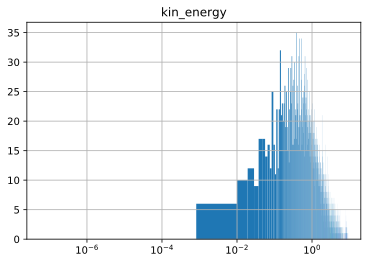

In [ ]:
pylab.figure(figsize=(50,50),dpi=400)
xe137.hist(column="kin_energy", bins =1000)
pylab.xlim(25e-9,20)
pylab.semilogx()

In [ ]:
# Load in the hits
# hits = load_mchits_df("/Users/mistryk2/Packages/nexus/workdir/files/Kr83_full_nexus_ACTIVE_7bar_100ev.sim.h5") 
hits = load_mchits_df("/Users/mistryk2/Packages/nexus/workdir/files/NEW_eminusgun_1_to_3_MeV_noELDiff.next.h5") 

In [ ]:
hits_slim = hits.query("particle_id==1")
hits_slim = hits_slim.query("event_id<=5")
hits_slim

In [ ]:
pylab.figure(figsize=(50,50),dpi=600)
ax = hits_slim.plot.scatter(x="x", y="z")